<a href="https://colab.research.google.com/github/Preetitamrakar-phd/Internship-At-The-Sparks-Foundation-/blob/main/Task4_EDA_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPJAN21**

**Preeti Tamrakar**

**Task #4** 

**To do:**  Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’. As a security/defense analyst, try to find out the hot zone of terrorism. Derive all the security issues and insights by EDA.


**STEP 1: Understand the Problem Statement & Import Packages and Datasets.**

In [2]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading and importing the dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist.csv


In [52]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

In [53]:
#printing head( first few rows) of the dataset 
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [54]:
df.shape # shows number of rows and columns

(181691, 135)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [56]:
df.describe() #Statistical Summary

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [57]:
# checking for duplicate values
df.duplicated().sum()

0

In [58]:
# Keeping only necessary columns
df= df[['iyear','imonth','extended','iday','country_txt','provstate','region_txt','city','latitude','longitude',
                 'attacktype1_txt','nkill','nwound','target1','summary','gname','targtype1_txt','weaptype1_txt','motive']]
df.head()

,iyear,imonth,extended,iday,country_txt,provstate,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,target1,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [59]:
#the total no of rows and columns
df.shape

(181691, 19)

In [60]:
#checking for any null values
df.isnull().sum()

iyear                   0
imonth                  0
extended                0
iday                    0
country_txt             0
provstate             421
region_txt              0
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
nkill               10313
nwound              16311
target1               636
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
motive             131130
dtype: int64

In [62]:
def display_unique(data):
    for column in data.columns :        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
display_unique(df)

No of Unique Values in iyear Column are : 47
Actual Unique Values in iyear Column are : [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]

No of Unique Values in imonth Column are : 13
Actual Unique Values in imonth Column are : [ 0  1  2  3  4  5  6  7  8  9 10 11 12]

No of Unique Values in extended Column are : 2
Actual Unique Values in extended Column are : [0 1]

No of Unique Values in iday Column are : 32
Actual Unique Values in iday Column are : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

No of Unique Values in country_txt Column are : 205
Actual Unique Values in country_txt Column are : ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrai

,iyear,imonth,extended,iday,latitude,longitude,nkill,nwound
iyear,1.000000,0.000139,0.091754,0.018254,0.166933,0.003917,0.015341,0.015273
imonth,0.000139,1.000000,-0.000468,0.005497,-0.015978,-0.003880,0.003463,0.002938
extended,0.091754,-0.000468,1.000000,-0.004700,-0.024749,0.000523,0.027737,-0.006627
iday,0.018254,0.005497,-0.004700,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,-0.024749,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,0.000523,-0.002285,0.001463,1.000000,-0.000562,0.000223
nkill,0.015341,0.003463,0.027737,-0.003693,-0.018124,-0.000562,1.000000,0.534375
nwound,0.015273,0.002938,-0.006627,-0.001268,0.015988,0.000223,0.534375,1.000000


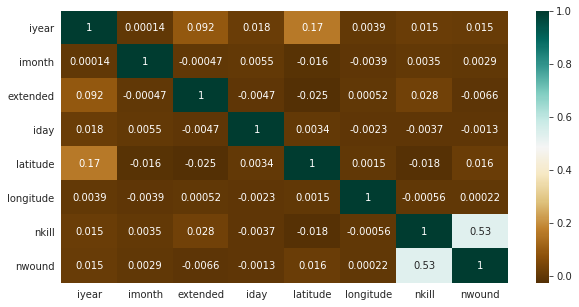

In [63]:
#PLOTTING AN HEATMAP TO KNOW THE COREALATION BETWEEN FEATURES
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

**DATA VISUALIZATION**

In [64]:
# Attack based on Country

# Renaming Index to Country Name
df1 = df.country_txt.value_counts().reset_index().rename(columns={'index': 'Country Name'})
df1.columns.values[1] = 'Count of Attacks'
df1.head(10)

,Country Name,Count of Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


In [65]:
df1.shape

(205, 2)

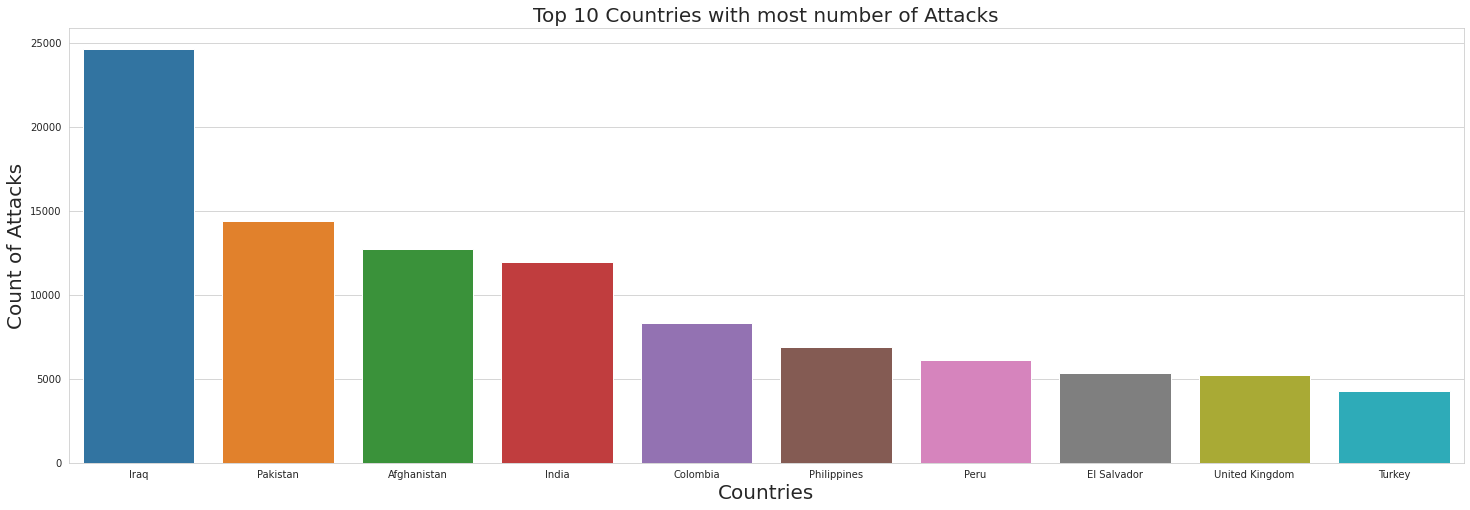

In [66]:
#Plot for top 10 most attack countries
df2 = df1.head(10)

sns.set_style('whitegrid')
plt.figure(figsize=(25,8))
sns.barplot(x = "Country Name", y = "Count of Attacks", data = df2)
plt.xlabel("Countries", fontsize = 20)
plt.ylabel("Count of Attacks", fontsize = 20)
plt.title("Top 10 Countries with most number of Attacks", fontsize = 20)
plt.show()


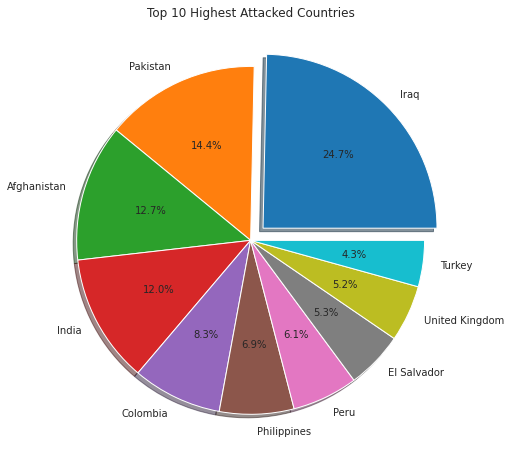

In [67]:
# Draw pie chart to see the percentages
plt.figure(figsize=(20,8))
plt.title('Top 10 Highest Attacked Countries')
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(df2['Count of Attacks'], labels=df2['Country Name'],shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

**2. Attack Based on Target Types**

In [68]:
target_type= df['targtype1_txt'].value_counts().reset_index().rename(columns={'index': 'Target Types'})
target_type.columns.values[1] = 'Count'
target_type.head(10)

,Target Types,Count
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


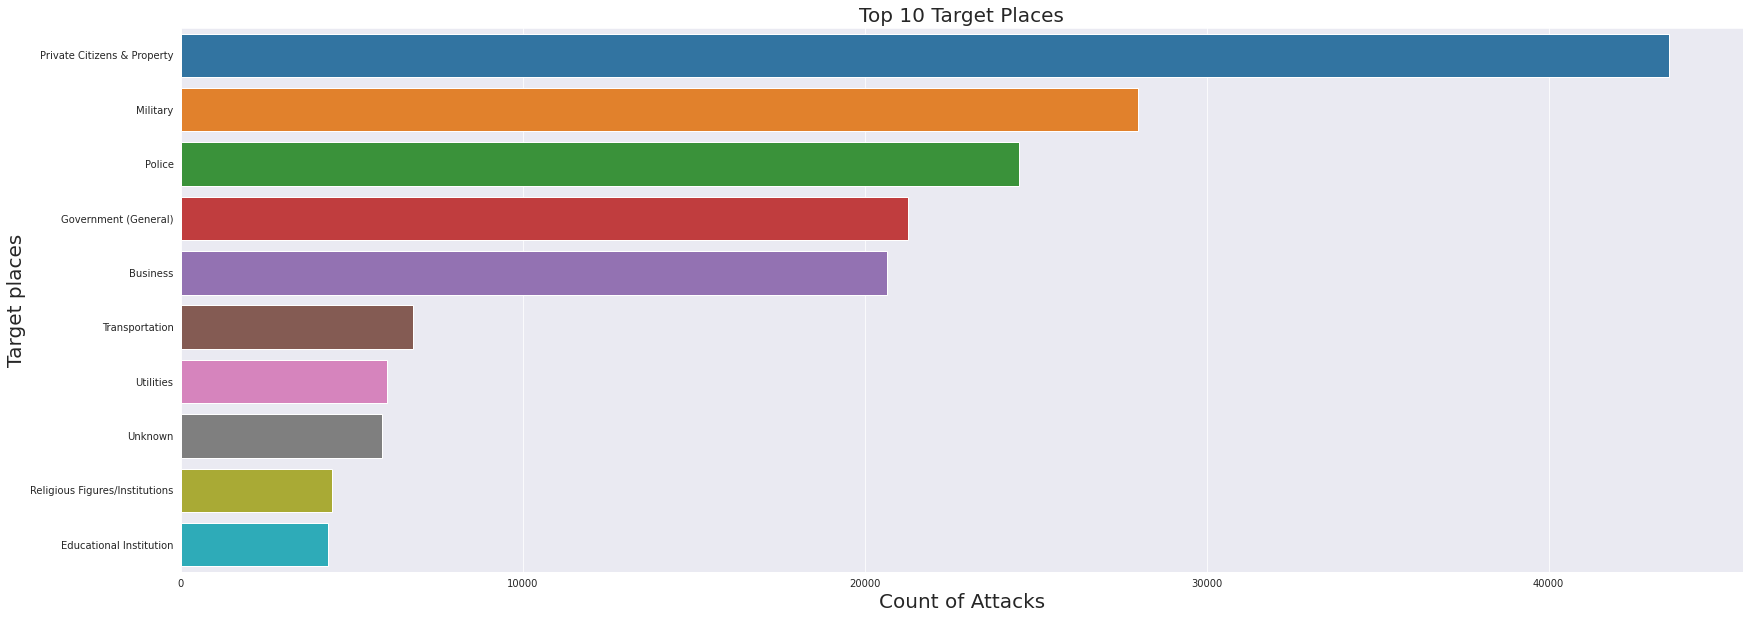

In [69]:
# Showing with bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(28, 10))
sns.barplot(y = "Target Types", x = "Count", data = target_type.head(10))
plt.xlabel('Count of Attacks', fontsize = 20)
plt.ylabel('Target places', fontsize = 20)
plt.title('Top 10 Target Places', fontsize = 20)
plt.show()

**3. Attacks based on Year**

In [70]:
years = df['iyear'].value_counts().reset_index()
years.columns.values[1] = 'Count of Attacks'
years.head(10)

,index,Count of Attacks
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


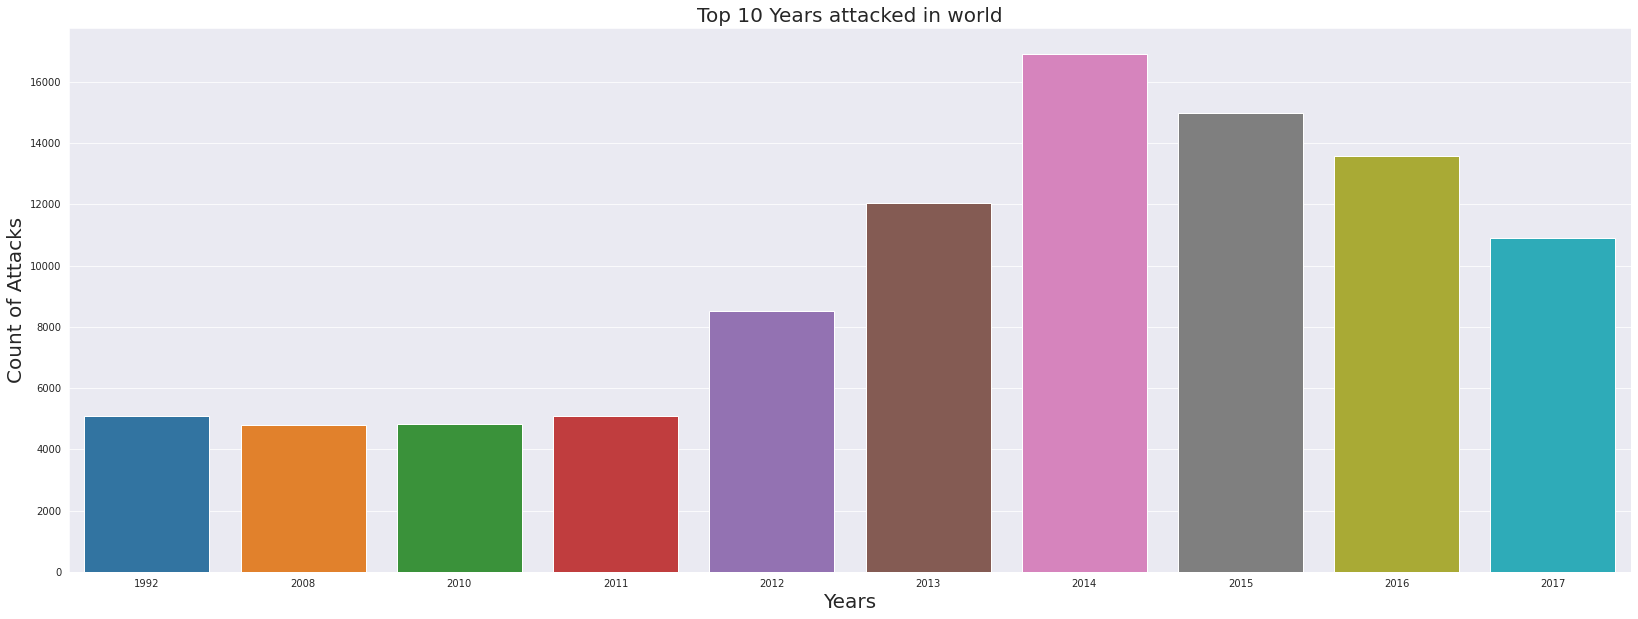

In [71]:
#Showing it with bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(28, 10))
sns.barplot(x="index", y="Count of Attacks", data=years.head(10))
plt.ylabel('Count of Attacks', fontsize = 20)
plt.xlabel('Years', fontsize = 20)
plt.title('Top 10 Years attacked in world', fontsize = 20)
plt.show()

**4. Attacks based on Weapons**

In [72]:
weapons = df['weaptype1_txt'].value_counts().reset_index()
weapons.columns.values[1] = 'Count of Attacks'
weapons.shape

(12, 2)

In [73]:
weapons.head(10)

,index,Count of Attacks
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


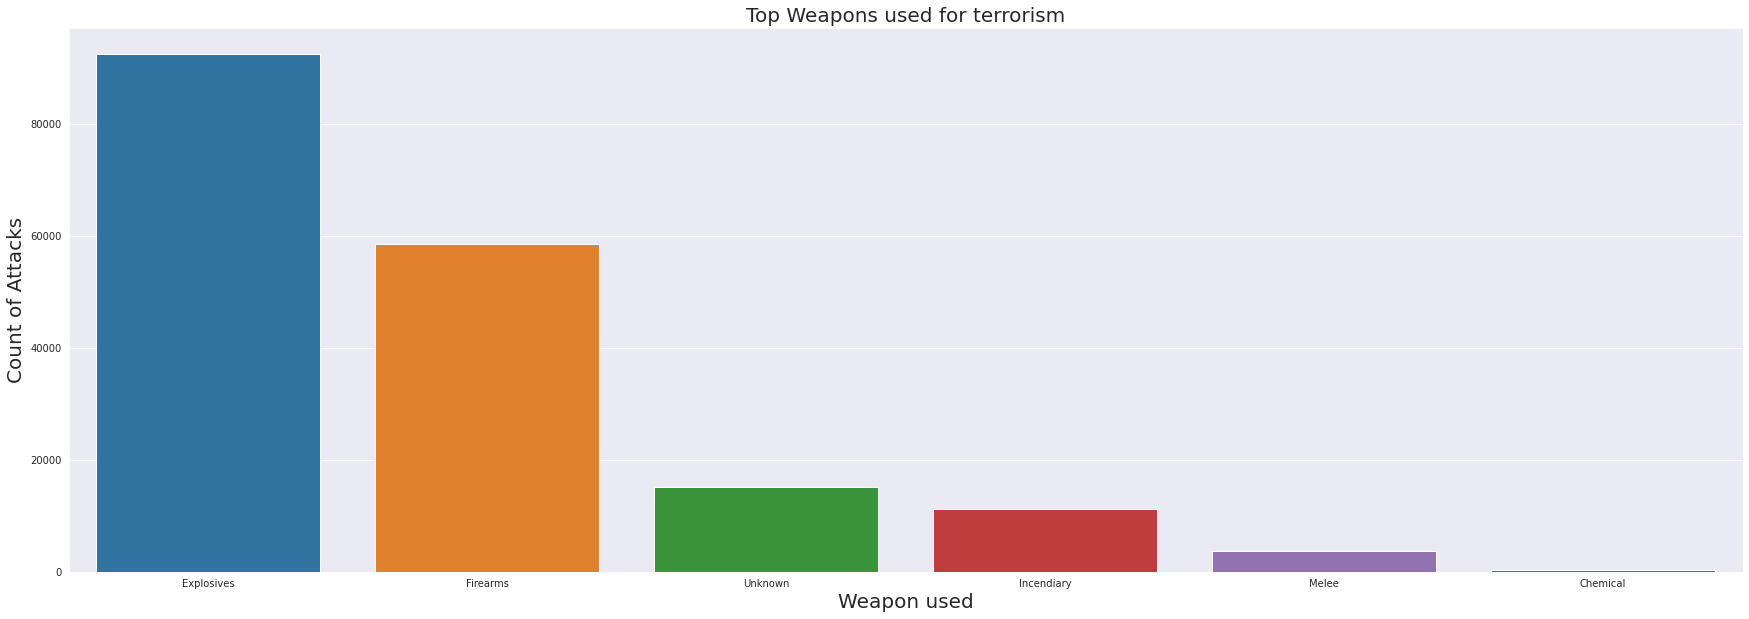

In [74]:
# Showing it with bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(30, 10))
sns.barplot(x="index", y="Count of Attacks", data=weapons.head(6))
plt.ylabel('Count of Attacks', fontsize = 20)
plt.xlabel('Weapon used', fontsize = 20)
plt.title('Top Weapons used for terrorism', fontsize = 20)
plt.show()

**5. Attacks based on Cities**

In [75]:
top_city = df.city.value_counts().reset_index().rename(columns={'index': 'City Name'})
top_city.columns.values[1] = 'Count of Attacks'
top_city = top_city.head(10)
top_city

,City Name,Count of Attacks
0,Unknown,9775
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171
6,Santiago,1621
7,Mogadishu,1581
8,San Salvador,1558
9,Istanbul,1048


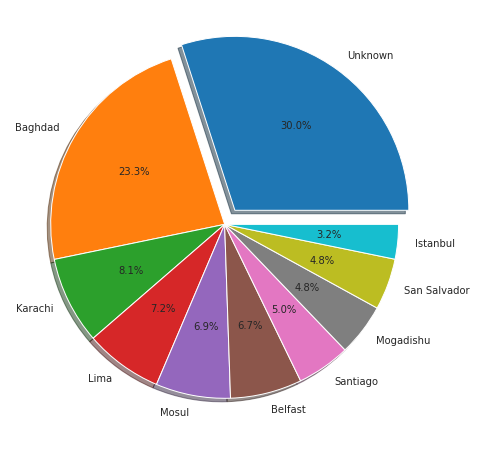

In [76]:
# Showing it with Pie chart along with percentages.
plt.figure(figsize=(8,8))
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(top_city['Count of Attacks'], labels=top_city['City Name'],shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

**Observations and Conclusion**
1. Top countries which have faced Terrorist attacks contains mostly Asian countries like Iraq,Pakistan,Afganistan,India etc.
2. Iraq having 24.7% attacks in world and "India" has 12% attacks.
3. Top Target places used for attacks are Private Citizens & Property, Military, Police, Government and Business.
4. Mostly Explosives, Firearms, Incendiary and Melee are used as  weapons for terrorist attack.
5. From 2012, there is a sudden rise in terrorism, with 2014 having most number of terrorist attacks in world.
